In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
# metrics
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Census API Key
from census import Census
from config import api_key
c = Census(api_key, year=2017)

In [2]:
df=pd.read_csv("Airbnb_Texas_Rentals.csv")
df

,Unnamed: 0,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
0,1,$27,2,Humble,May 2016,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...
1,2,$149,4,San Antonio,November 2010,"Stylish, fully remodeled home in upscale NW – ...",29.503068,-98.447688,Unique Location! Alamo Heights - Designer Insp...,https://www.airbnb.com/rooms/17481455?location...
2,3,$59,1,Houston,January 2017,'River house on island close to the city' \nA ...,29.829352,-95.081549,River house near the city,https://www.airbnb.com/rooms/16926307?location...
3,4,$60,1,Bryan,February 2016,Private bedroom in a cute little home situated...,30.637304,-96.337846,Private Room Close to Campus,https://www.airbnb.com/rooms/11839729?location...
4,5,$75,2,Fort Worth,February 2017,Welcome to our original 1920's home. We recent...,32.747097,-97.286434,The Porch,https://www.airbnb.com/rooms/17325114?location...
...,...,...,...,...,...,...,...,...,...,...
18254,18255,$60,1,Dallas,March 2013,An entire 1 bedroom 700+sqft condo in the hear...,32.892303,-96.772049,Quiet comfort living in Dallas,https://www.airbnb.com/rooms/1011576?location=...
18255,18256,$99,2,San Antonio,June 2015,An inviting 1920's cottage home in a popular u...,29.452893,-98.486756,Midtown Cottage Near Riverwalk,https://www.airbnb.com/rooms/18766940?location...
18256,18257,$13,1,Dallas,December 2016,Amazing 3BHK Apartment in a picturesque Commun...,33.001955,-96.777615,Room in Dallas!,https://www.airbnb.com/rooms/18719059?location...
18257,18258,$65,2,San Antonio,October 2016,My quaint and cozy home is conveniently locate...,29.450142,-98.505333,Vibrant Spacious Loft!,https://www.airbnb.com/rooms/18179329?location...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              18259 non-null  int64  
 1   average_rate_per_night  18231 non-null  object 
 2   bedrooms_count          18256 non-null  object 
 3   city                    18259 non-null  object 
 4   date_of_listing         18259 non-null  object 
 5   description             18257 non-null  object 
 6   latitude                18225 non-null  float64
 7   longitude               18225 non-null  float64
 8   title                   18256 non-null  object 
 9   url                     18259 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.4+ MB


In [4]:
df.count()

Unnamed: 0                18259
average_rate_per_night    18231
bedrooms_count            18256
city                      18259
date_of_listing           18259
description               18257
latitude                  18225
longitude                 18225
title                     18256
url                       18259
dtype: int64

In [5]:
clean_df = df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18217 entries, 0 to 18258
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              18217 non-null  int64  
 1   average_rate_per_night  18217 non-null  object 
 2   bedrooms_count          18217 non-null  object 
 3   city                    18217 non-null  object 
 4   date_of_listing         18217 non-null  object 
 5   description             18217 non-null  object 
 6   latitude                18217 non-null  float64
 7   longitude               18217 non-null  float64
 8   title                   18217 non-null  object 
 9   url                     18217 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.5+ MB


In [6]:
# summary data frame
clean_df2 = clean_df.loc[:, ["city", "date_of_listing", "bedrooms_count", "average_rate_per_night", "latitude", "longitude"]]
clean_df2

,city,date_of_listing,bedrooms_count,average_rate_per_night,latitude,longitude
0,Humble,May 2016,2,$27,30.020138,-95.293996
1,San Antonio,November 2010,4,$149,29.503068,-98.447688
2,Houston,January 2017,1,$59,29.829352,-95.081549
3,Bryan,February 2016,1,$60,30.637304,-96.337846
4,Fort Worth,February 2017,2,$75,32.747097,-97.286434
...,...,...,...,...,...,...
18254,Dallas,March 2013,1,$60,32.892303,-96.772049
18255,San Antonio,June 2015,2,$99,29.452893,-98.486756
18256,Dallas,December 2016,1,$13,33.001955,-96.777615
18257,San Antonio,October 2016,2,$65,29.450142,-98.505333


In [7]:
clean_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18217 entries, 0 to 18258
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18217 non-null  object 
 1   date_of_listing         18217 non-null  object 
 2   bedrooms_count          18217 non-null  object 
 3   average_rate_per_night  18217 non-null  object 
 4   latitude                18217 non-null  float64
 5   longitude               18217 non-null  float64
dtypes: float64(2), object(4)
memory usage: 996.2+ KB


In [8]:
clean_df2["date_of_listing"]=pd.to_datetime(clean_df2["date_of_listing"])

clean_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18217 entries, 0 to 18258
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    18217 non-null  object        
 1   date_of_listing         18217 non-null  datetime64[ns]
 2   bedrooms_count          18217 non-null  object        
 3   average_rate_per_night  18217 non-null  object        
 4   latitude                18217 non-null  float64       
 5   longitude               18217 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 996.2+ KB


In [9]:
clean_df2["year"]=[x.year for x in clean_df2.date_of_listing]
clean_df2.head()

,city,date_of_listing,bedrooms_count,average_rate_per_night,latitude,longitude,year
0,Humble,2016-05-01,2,$27,30.020138,-95.293996,2016
1,San Antonio,2010-11-01,4,$149,29.503068,-98.447688,2010
2,Houston,2017-01-01,1,$59,29.829352,-95.081549,2017
3,Bryan,2016-02-01,1,$60,30.637304,-96.337846,2016
4,Fort Worth,2017-02-01,2,$75,32.747097,-97.286434,2017


In [10]:
unique_year = clean_df2["year"].nunique()
unique_year

10

In [11]:
clean_df2["month"]=[x.month for x in clean_df2.date_of_listing]
clean_df2.head()

,city,date_of_listing,bedrooms_count,average_rate_per_night,latitude,longitude,year,month
0,Humble,2016-05-01,2,$27,30.020138,-95.293996,2016,5
1,San Antonio,2010-11-01,4,$149,29.503068,-98.447688,2010,11
2,Houston,2017-01-01,1,$59,29.829352,-95.081549,2017,1
3,Bryan,2016-02-01,1,$60,30.637304,-96.337846,2016,2
4,Fort Worth,2017-02-01,2,$75,32.747097,-97.286434,2017,2


In [12]:
clean_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18217 entries, 0 to 18258
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    18217 non-null  object        
 1   date_of_listing         18217 non-null  datetime64[ns]
 2   bedrooms_count          18217 non-null  object        
 3   average_rate_per_night  18217 non-null  object        
 4   latitude                18217 non-null  float64       
 5   longitude               18217 non-null  float64       
 6   year                    18217 non-null  int64         
 7   month                   18217 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [13]:
mask1 = clean_df2.loc[clean_df2['year']==2012].index
mask2 = clean_df2.loc[clean_df2['year']==2011].index
mask3 = clean_df2.loc[clean_df2['year']==2010].index
mask4 = clean_df2.loc[clean_df2['year']==2009].index
mask5 = clean_df2.loc[clean_df2['year']==2008].index

In [14]:
mask1.array

<PandasArray>
[   12,    37,    89,   222,   262,   276,   311,   327,   340,   351,
 ...
 18090, 18120, 18136, 18137, 18146, 18159, 18184, 18205, 18213, 18215]
Length: 799, dtype: int64

In [15]:
clean_df3 = clean_df2[~(clean_df2.year.isin([2012, 2011, 2010, 2009, 2008]))].reset_index()
clean_df3.head()

,index,city,date_of_listing,bedrooms_count,average_rate_per_night,latitude,longitude,year,month
0,0,Humble,2016-05-01,2,$27,30.020138,-95.293996,2016,5
1,2,Houston,2017-01-01,1,$59,29.829352,-95.081549,2017,1
2,3,Bryan,2016-02-01,1,$60,30.637304,-96.337846,2016,2
3,4,Fort Worth,2017-02-01,2,$75,32.747097,-97.286434,2017,2
4,5,Conroe,2016-08-01,4,$250,30.370455,-95.385319,2016,8


In [16]:
clean_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16799 entries, 0 to 16798
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   16799 non-null  int64         
 1   city                    16799 non-null  object        
 2   date_of_listing         16799 non-null  datetime64[ns]
 3   bedrooms_count          16799 non-null  object        
 4   average_rate_per_night  16799 non-null  object        
 5   latitude                16799 non-null  float64       
 6   longitude               16799 non-null  float64       
 7   year                    16799 non-null  int64         
 8   month                   16799 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.2+ MB


In [17]:
# Create the bins in which Data will be held
# Bins are  12-1-2016, 7-1-2016, 1-1-2018
bins = [0, 3, 6, 9, 12]

# Create the names for the five bins
group_names = ["First", "Second", "Third", "Fourth"]

In [18]:
clean_df3["Date_Quarter"] = pd.cut(clean_df3["month"], bins, labels=group_names, include_lowest=True)
clean_df3

,index,city,date_of_listing,bedrooms_count,average_rate_per_night,latitude,longitude,year,month,Date_Quarter
0,0,Humble,2016-05-01,2,$27,30.020138,-95.293996,2016,5,Second
1,2,Houston,2017-01-01,1,$59,29.829352,-95.081549,2017,1,First
2,3,Bryan,2016-02-01,1,$60,30.637304,-96.337846,2016,2,First
3,4,Fort Worth,2017-02-01,2,$75,32.747097,-97.286434,2017,2,First
4,5,Conroe,2016-08-01,4,$250,30.370455,-95.385319,2016,8,Third
...,...,...,...,...,...,...,...,...,...,...
16794,18254,Dallas,2013-03-01,1,$60,32.892303,-96.772049,2013,3,First
16795,18255,San Antonio,2015-06-01,2,$99,29.452893,-98.486756,2015,6,Second
16796,18256,Dallas,2016-12-01,1,$13,33.001955,-96.777615,2016,12,Fourth
16797,18257,San Antonio,2016-10-01,2,$65,29.450142,-98.505333,2016,10,Fourth


In [19]:
# summary data frame
clean_df4 = clean_df3.loc[:, ["city", "year", "Date_Quarter", "bedrooms_count", "average_rate_per_night", "latitude", "longitude"]]
clean_df4.head()

,city,year,Date_Quarter,bedrooms_count,average_rate_per_night,latitude,longitude
0,Humble,2016,Second,2,$27,30.020138,-95.293996
1,Houston,2017,First,1,$59,29.829352,-95.081549
2,Bryan,2016,First,1,$60,30.637304,-96.337846
3,Fort Worth,2017,First,2,$75,32.747097,-97.286434
4,Conroe,2016,Third,4,$250,30.370455,-95.385319


In [20]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")

In [21]:
location = geolocator.reverse("30.020138, -95.293996")
location.raw

{'place_id': 291315935,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 198797061,
 'lat': '30.02013976623853',
 'lon': '-95.29412005281664',
 'display_name': '20521, Kenswick Drive, Bordersville, Harris County, Texas, 77338, United States',
 'address': {'house_number': '20521',
  'road': 'Kenswick Drive',
  'hamlet': 'Bordersville',
  'county': 'Harris County',
  'state': 'Texas',
  'postcode': '77338',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['30.020089766239',
  '30.020189766239',
  '-95.294170052817',
  '-95.294070052817']}

In [ ]:
# counties = []
# zipcodes = []

# for indx,row in clean_df4.iterrows():
#     lat=row["latitude"]
#     lon=row["longitude"]
#     location = geolocator.reverse(f"{lat}, {lon}", timeout=None)
    
#     county = location.raw["address"].get("county")
#     zipcode = location.raw["address"].get("postcode")
#     counties.append(county)
#     zipcodes.append(zipcode)

#     if indx % 100==0:
#         print(indx)
    

In [ ]:
# len(counties)

In [ ]:
# clean_df4.head()


In [ ]:
# len(zipcodes)

In [ ]:
# counties

In [ ]:
# clean_df4['counties'] = counties
# clean_df4['zipcodes'] = zipcodes
# clean_df4

In [ ]:
# # Export file as a CSV, without the Pandas index, but with the header - So we don't have to run the above code every
# # time we open the file. 
# clean_df4.to_csv("airbnb_counties.csv", index=False, header=True)

In [23]:
# read in airbnb_counties csv
airbnb_df=pd.read_csv("airbnb_counties.csv")
airbnb_df

,city,year,Date_Quarter,bedrooms_count,average_rate_per_night,latitude,longitude,counties,zipcodes
0,Humble,2016,Second,2,$27,30.020138,-95.293996,Harris County,77338
1,Houston,2017,First,1,$59,29.829352,-95.081549,Harris County,77049
2,Bryan,2016,First,1,$60,30.637304,-96.337846,Brazos County,77802
3,Fort Worth,2017,First,2,$75,32.747097,-97.286434,Tarrant County,76103
4,Conroe,2016,Third,4,$250,30.370455,-95.385319,Montgomery County,77303
...,...,...,...,...,...,...,...,...,...
16794,Dallas,2013,First,1,$60,32.892303,-96.772049,Dallas County,75230
16795,San Antonio,2015,Second,2,$99,29.452893,-98.486756,Bexar County,78212
16796,Dallas,2016,Fourth,1,$13,33.001955,-96.777615,Collin County,75252
16797,San Antonio,2016,Fourth,2,$65,29.450142,-98.505333,Bexar County,78212


In [24]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16799 entries, 0 to 16798
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    16799 non-null  object 
 1   year                    16799 non-null  int64  
 2   Date_Quarter            16799 non-null  object 
 3   bedrooms_count          16799 non-null  object 
 4   average_rate_per_night  16799 non-null  object 
 5   latitude                16799 non-null  float64
 6   longitude               16799 non-null  float64
 7   counties                16799 non-null  object 
 8   zipcodes                16030 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.2+ MB


In [25]:
# read in census csv
census_df=pd.read_csv("acs2017_county_data.csv")
census_df.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [36]:
# Change 'Studio' room to 0
# Change value from object to numeric

bedrooms_clean = airbnb_df['bedrooms_count']

bedrooms_clean = pd.to_numeric(["0" if i=='Studio' else i for i in bedrooms_clean])
bedrooms_clean

array([2, 1, 1, ..., 1, 2, 1], dtype=int64)

In [37]:
# Add bedrooms into Data Frame
airbnb_df['bedrooms'] = bedrooms_clean
airbnb_df

,city,year,Date_Quarter,bedrooms_count,average_rate_per_night,latitude,longitude,counties,zipcodes,bedrooms
0,Humble,2016,Second,2,$27,30.020138,-95.293996,Harris County,77338,2
1,Houston,2017,First,1,$59,29.829352,-95.081549,Harris County,77049,1
2,Bryan,2016,First,1,$60,30.637304,-96.337846,Brazos County,77802,1
3,Fort Worth,2017,First,2,$75,32.747097,-97.286434,Tarrant County,76103,2
4,Conroe,2016,Third,4,$250,30.370455,-95.385319,Montgomery County,77303,4
...,...,...,...,...,...,...,...,...,...,...
16794,Dallas,2013,First,1,$60,32.892303,-96.772049,Dallas County,75230,1
16795,San Antonio,2015,Second,2,$99,29.452893,-98.486756,Bexar County,78212,2
16796,Dallas,2016,Fourth,1,$13,33.001955,-96.777615,Collin County,75252,1
16797,San Antonio,2016,Fourth,2,$65,29.450142,-98.505333,Bexar County,78212,2


In [38]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16799 entries, 0 to 16798
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    16799 non-null  object 
 1   year                    16799 non-null  int64  
 2   Date_Quarter            16799 non-null  object 
 3   bedrooms_count          16799 non-null  object 
 4   average_rate_per_night  16799 non-null  object 
 5   latitude                16799 non-null  float64
 6   longitude               16799 non-null  float64
 7   counties                16799 non-null  object 
 8   zipcodes                16030 non-null  object 
 9   bedrooms                16799 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.3+ MB


In [39]:
# Remove $ and convert into integer
airbnb_df['average_rate_per_night'] = airbnb_df['average_rate_per_night'].str.replace('$', '').astype(int)
airbnb_df

<ipython-input-39-4f226d013058>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb_df['average_rate_per_night'] = airbnb_df['average_rate_per_night'].str.replace('$', '').astype(int)


,city,year,Date_Quarter,bedrooms_count,average_rate_per_night,latitude,longitude,counties,zipcodes,bedrooms
0,Humble,2016,Second,2,27,30.020138,-95.293996,Harris County,77338,2
1,Houston,2017,First,1,59,29.829352,-95.081549,Harris County,77049,1
2,Bryan,2016,First,1,60,30.637304,-96.337846,Brazos County,77802,1
3,Fort Worth,2017,First,2,75,32.747097,-97.286434,Tarrant County,76103,2
4,Conroe,2016,Third,4,250,30.370455,-95.385319,Montgomery County,77303,4
...,...,...,...,...,...,...,...,...,...,...
16794,Dallas,2013,First,1,60,32.892303,-96.772049,Dallas County,75230,1
16795,San Antonio,2015,Second,2,99,29.452893,-98.486756,Bexar County,78212,2
16796,Dallas,2016,Fourth,1,13,33.001955,-96.777615,Collin County,75252,1
16797,San Antonio,2016,Fourth,2,65,29.450142,-98.505333,Bexar County,78212,2


In [40]:
rate_mean = airbnb_df.groupby("counties")["average_rate_per_night"].mean()
rate_median = airbnb_df.groupby("counties")["average_rate_per_night"].median()
bed_mean = airbnb_df.groupby("counties")["bedrooms"].mean()
bed_median = airbnb_df.groupby("counties")["bedrooms"].median()
 
    
# Assemble the resulting series into a single summary dataframe
agg_df = pd.DataFrame({"airbnb_rate_mean": rate_mean,
                       "airbnb_rate_median": rate_median,
                       "airbnb_beds_mean": bed_mean,
                        "airbnb_beds_median": bed_median}).reset_index()
agg_df


,counties,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median
0,Anderson County,88.875000,70.0,1.875000,1.0
1,Aransas County,333.556650,273.0,2.645320,3.0
2,Austin County,260.938144,175.0,2.329897,2.0
3,Bandera County,167.022472,134.0,1.578652,1.0
4,Bastrop County,185.616935,115.0,1.709677,1.0
...,...,...,...,...,...
101,Washington County,296.383721,200.0,2.069767,2.0
102,Wharton County,396.000000,56.5,1.333333,1.0
103,Williamson County,113.623318,69.0,1.668161,1.0
104,Wise County,250.333333,197.0,2.277778,2.0


In [41]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   counties            106 non-null    object 
 1   airbnb_rate_mean    106 non-null    float64
 2   airbnb_rate_median  106 non-null    float64
 3   airbnb_beds_mean    106 non-null    float64
 4   airbnb_beds_median  106 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


In [26]:
census_tx = census_df.loc[census_df.State == "Texas"].reset_index()
census_tx.head()

,index,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,2523,48001,Texas,Anderson County,57747,35292,22455,17.3,59.7,20.9,...,0.5,0.7,3.6,23.7,19102,73.2,20.4,6.2,0.2,4.3
1,2524,48003,Texas,Andrews County,17577,8980,8597,55.4,41.1,1.5,...,0.0,0.8,2.5,19.8,8054,85.3,8.7,5.7,0.3,4.5
2,2525,48005,Texas,Angelina County,87700,42707,44993,21.5,61.2,14.7,...,1.7,0.9,2.2,18.7,36164,77.2,16.7,6.0,0.1,7.6
3,2526,48007,Texas,Aransas County,24832,12448,12384,27.0,67.7,1.6,...,2.8,0.5,6.8,20.8,10387,72.9,12.3,14.6,0.2,6.7
4,2527,48009,Texas,Archer County,8793,4335,4458,8.3,88.6,0.8,...,1.0,1.1,4.7,20.4,4344,75.6,14.5,9.8,0.0,3.0


In [27]:
census_tx.loc[census_tx.County == "Harris County"]

,index,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
100,2623,48201,Texas,Harris County,4525519,2251060,2274459,42.2,30.6,18.5,...,1.5,1.9,3.7,28.9,2180392,83.4,9.8,6.6,0.2,6.4


In [28]:
# summary data frame
clean_tx = census_tx.loc[:, ["County", "TotalPop", "Income", "Poverty"]]
clean_tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   County    254 non-null    object 
 1   TotalPop  254 non-null    int64  
 2   Income    254 non-null    int64  
 3   Poverty   254 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.1+ KB


In [29]:
clean_tx = clean_tx.rename(columns = {"County":"counties"})
clean_tx.head()

,counties,TotalPop,Income,Poverty
0,Anderson County,57747,42313,15.7
1,Andrews County,17577,70753,11.9
2,Angelina County,87700,46472,19.1
3,Aransas County,24832,44601,17.8
4,Archer County,8793,63192,8.8


In [30]:
clean_tx.loc[census_tx.County == "Harris County"]

,counties,TotalPop,Income,Poverty
100,Harris County,4525519,57791,16.8


In [42]:
# Merge Airbnb and Census dataframes on counties to show all data
clean_tx2 = pd.merge(airbnb_df, clean_tx, on="counties")
clean_tx2.head()

,city,year,Date_Quarter,bedrooms_count,average_rate_per_night,latitude,longitude,counties,zipcodes,bedrooms,TotalPop,Income,Poverty
0,Humble,2016,Second,2,27,30.020138,-95.293996,Harris County,77338,2,4525519,57791,16.8
1,Houston,2017,First,1,59,29.829352,-95.081549,Harris County,77049,1,4525519,57791,16.8
2,Houston,2017,First,4,1500,29.954680,-95.176070,Harris County,77044,4,4525519,57791,16.8
3,Katy,2017,First,4,2999,29.823802,-95.730637,Harris County,77449,4,4525519,57791,16.8
4,Katy,2016,Third,3,165,29.766553,-95.783192,Harris County,77494,3,4525519,57791,16.8


In [43]:
clean_tx2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16799 entries, 0 to 16798
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    16799 non-null  object 
 1   year                    16799 non-null  int64  
 2   Date_Quarter            16799 non-null  object 
 3   bedrooms_count          16799 non-null  object 
 4   average_rate_per_night  16799 non-null  int32  
 5   latitude                16799 non-null  float64
 6   longitude               16799 non-null  float64
 7   counties                16799 non-null  object 
 8   zipcodes                16030 non-null  object 
 9   bedrooms                16799 non-null  int64  
 10  TotalPop                16799 non-null  int64  
 11  Income                  16799 non-null  int64  
 12  Poverty                 16799 non-null  float64
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 1.7+ MB


In [44]:
# Merge census data with aggregation data to show mean/median for counties and nan values for counties with no data
# will skip in analysis
clean_tx3 = pd.merge(agg_df, clean_tx, on="counties", how='right')
clean_tx3.head()

,counties,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty
0,Anderson County,88.87500,70.0,1.87500,1.0,57747,42313,15.7
1,Andrews County,NaN,NaN,NaN,NaN,17577,70753,11.9
2,Angelina County,NaN,NaN,NaN,NaN,87700,46472,19.1
3,Aransas County,333.55665,273.0,2.64532,3.0,24832,44601,17.8
4,Archer County,NaN,NaN,NaN,NaN,8793,63192,8.8


In [45]:
clean_tx3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 0 to 253
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   counties            254 non-null    object 
 1   airbnb_rate_mean    106 non-null    float64
 2   airbnb_rate_median  106 non-null    float64
 3   airbnb_beds_mean    106 non-null    float64
 4   airbnb_beds_median  106 non-null    float64
 5   TotalPop            254 non-null    int64  
 6   Income              254 non-null    int64  
 7   Poverty             254 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 17.9+ KB


In [46]:
clean_tx4 = clean_tx3.fillna(0)
clean_tx4

,counties,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty
0,Anderson County,88.875000,70.0,1.875000,1.0,57747,42313,15.7
1,Andrews County,0.000000,0.0,0.000000,0.0,17577,70753,11.9
2,Angelina County,0.000000,0.0,0.000000,0.0,87700,46472,19.1
3,Aransas County,333.556650,273.0,2.645320,3.0,24832,44601,17.8
4,Archer County,0.000000,0.0,0.000000,0.0,8793,63192,8.8
...,...,...,...,...,...,...,...,...
249,Wood County,216.909091,122.5,2.181818,2.0,43315,48038,13.3
250,Yoakum County,0.000000,0.0,0.000000,0.0,8481,62500,12.3
251,Young County,0.000000,0.0,0.000000,0.0,18166,46351,16.5
252,Zapata County,0.000000,0.0,0.000000,0.0,14415,34550,34.1


In [52]:
# Drop Null valus from table
clean_tx5 = clean_tx3.dropna(how='any')
clean_tx5

,counties,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty
0,Anderson County,88.875000,70.0,1.875000,1.0,57747,42313,15.7
3,Aransas County,333.556650,273.0,2.645320,3.0,24832,44601,17.8
7,Austin County,260.938144,175.0,2.329897,2.0,29292,62614,13.4
9,Bandera County,167.022472,134.0,1.578652,1.0,21316,56413,16.5
10,Bastrop County,185.616935,115.0,1.709677,1.0,80306,59185,13.3
...,...,...,...,...,...,...,...,...
238,Washington County,296.383721,200.0,2.069767,2.0,34667,55793,13.2
240,Wharton County,396.000000,56.5,1.333333,1.0,41430,50145,17.5
245,Williamson County,113.623318,69.0,1.668161,1.0,508313,79123,7.0
248,Wise County,250.333333,197.0,2.277778,2.0,63247,59081,13.0


In [47]:
# Make Bins for Rural and Uban 

bins_1 = [0, 50000, 4600000]

# Create the names for the five bins
group_names1 = ["Rural", "Urban"]

In [49]:
# Add bin to chart
clean_tx4["Urban_Rural"] = pd.cut(clean_tx4["TotalPop"], bins_1, labels=group_names1, include_lowest=True)
clean_tx4

,counties,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty,Urban_Rural
0,Anderson County,88.875000,70.0,1.875000,1.0,57747,42313,15.7,Urban
1,Andrews County,0.000000,0.0,0.000000,0.0,17577,70753,11.9,Rural
2,Angelina County,0.000000,0.0,0.000000,0.0,87700,46472,19.1,Urban
3,Aransas County,333.556650,273.0,2.645320,3.0,24832,44601,17.8,Rural
4,Archer County,0.000000,0.0,0.000000,0.0,8793,63192,8.8,Rural
...,...,...,...,...,...,...,...,...,...
249,Wood County,216.909091,122.5,2.181818,2.0,43315,48038,13.3,Rural
250,Yoakum County,0.000000,0.0,0.000000,0.0,8481,62500,12.3,Rural
251,Young County,0.000000,0.0,0.000000,0.0,18166,46351,16.5,Rural
252,Zapata County,0.000000,0.0,0.000000,0.0,14415,34550,34.1,Rural


In [50]:
# Urban Data
urban_cleantx_df = clean_tx4.loc[clean_tx4.Urban_Rural == "Urban"]
urban_cleantx_df

,counties,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty,Urban_Rural
0,Anderson County,88.875000,70.0,1.875000,1.0,57747,42313,15.7,Urban
2,Angelina County,0.000000,0.0,0.000000,0.0,87700,46472,19.1,Urban
10,Bastrop County,185.616935,115.0,1.709677,1.0,80306,59185,13.3,Urban
13,Bell County,81.037736,50.0,1.479245,1.0,336506,52583,14.3,Urban
14,Bexar County,94.482128,70.0,1.547797,1.0,1892004,53999,16.4,Urban
...,...,...,...,...,...,...,...,...,...
235,Walker County,136.000000,136.0,2.000000,2.0,70818,41456,24.3,Urban
239,Webb County,0.000000,0.0,0.000000,0.0,269624,40442,31.5,Urban
242,Wichita County,0.000000,0.0,0.000000,0.0,131778,45776,18.9,Urban
245,Williamson County,113.623318,69.0,1.668161,1.0,508313,79123,7.0,Urban


In [51]:
# Rural data
rural_cleantx_df = clean_tx4.loc[clean_tx4.Urban_Rural == "Rural"]
rural_cleantx_df

,counties,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty,Urban_Rural
1,Andrews County,0.000000,0.0,0.000000,0.0,17577,70753,11.9,Rural
3,Aransas County,333.556650,273.0,2.645320,3.0,24832,44601,17.8,Rural
4,Archer County,0.000000,0.0,0.000000,0.0,8793,63192,8.8,Rural
5,Armstrong County,0.000000,0.0,0.000000,0.0,1929,68750,7.5,Rural
6,Atascosa County,0.000000,0.0,0.000000,0.0,48139,55194,14.6,Rural
...,...,...,...,...,...,...,...,...,...
249,Wood County,216.909091,122.5,2.181818,2.0,43315,48038,13.3,Rural
250,Yoakum County,0.000000,0.0,0.000000,0.0,8481,62500,12.3,Rural
251,Young County,0.000000,0.0,0.000000,0.0,18166,46351,16.5,Rural
252,Zapata County,0.000000,0.0,0.000000,0.0,14415,34550,34.1,Rural


In [53]:
# Urban and rural in the dropped values dataframe
clean_tx5["Urban_Rural"] = pd.cut(clean_tx5["TotalPop"], bins_1, labels=group_names1, include_lowest=True)
clean_tx5

<ipython-input-53-5c1245c901a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_tx5["Urban_Rural"] = pd.cut(clean_tx5["TotalPop"], bins_1, labels=group_names1, include_lowest=True)


,counties,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty,Urban_Rural
0,Anderson County,88.875000,70.0,1.875000,1.0,57747,42313,15.7,Urban
3,Aransas County,333.556650,273.0,2.645320,3.0,24832,44601,17.8,Rural
7,Austin County,260.938144,175.0,2.329897,2.0,29292,62614,13.4,Rural
9,Bandera County,167.022472,134.0,1.578652,1.0,21316,56413,16.5,Rural
10,Bastrop County,185.616935,115.0,1.709677,1.0,80306,59185,13.3,Urban
...,...,...,...,...,...,...,...,...,...
238,Washington County,296.383721,200.0,2.069767,2.0,34667,55793,13.2,Rural
240,Wharton County,396.000000,56.5,1.333333,1.0,41430,50145,17.5,Rural
245,Williamson County,113.623318,69.0,1.668161,1.0,508313,79123,7.0,Urban
248,Wise County,250.333333,197.0,2.277778,2.0,63247,59081,13.0,Urban


In [55]:
# Urban Data
urban_cleantx_df2 = clean_tx5.loc[clean_tx5.Urban_Rural == "Urban"]
urban_cleantx_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 248
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   counties            45 non-null     object  
 1   airbnb_rate_mean    45 non-null     float64 
 2   airbnb_rate_median  45 non-null     float64 
 3   airbnb_beds_mean    45 non-null     float64 
 4   airbnb_beds_median  45 non-null     float64 
 5   TotalPop            45 non-null     int64   
 6   Income              45 non-null     int64   
 7   Poverty             45 non-null     float64 
 8   Urban_Rural         45 non-null     category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 3.3+ KB


In [56]:
# Rural data
rural_cleantx_df2 = clean_tx5.loc[clean_tx5.Urban_Rural == "Rural"]
rural_cleantx_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 3 to 249
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   counties            61 non-null     object  
 1   airbnb_rate_mean    61 non-null     float64 
 2   airbnb_rate_median  61 non-null     float64 
 3   airbnb_beds_mean    61 non-null     float64 
 4   airbnb_beds_median  61 non-null     float64 
 5   TotalPop            61 non-null     int64   
 6   Income              61 non-null     int64   
 7   Poverty             61 non-null     float64 
 8   Urban_Rural         61 non-null     category
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 4.5+ KB


In [57]:
# Correlation between airbnb and census
corrs1 = clean_tx2.corr()
corrs1

,year,average_rate_per_night,latitude,longitude,bedrooms,TotalPop,Income,Poverty
year,1.000000,0.072134,-0.051052,0.069336,0.076076,-0.015643,-0.006607,0.013146
average_rate_per_night,0.072134,1.000000,-0.113772,0.092103,0.478020,-0.033310,0.012369,0.001625
latitude,-0.051052,-0.113772,1.000000,-0.103368,-0.093498,0.076818,0.270531,-0.324150
longitude,0.069336,0.092103,-0.103368,1.000000,0.035796,0.387658,0.135663,0.132776
bedrooms,0.076076,0.478020,-0.093498,0.035796,1.000000,-0.152541,-0.026487,0.013044
TotalPop,-0.015643,-0.033310,0.076818,0.387658,-0.152541,1.000000,-0.075115,0.160188
Income,-0.006607,0.012369,0.270531,0.135663,-0.026487,-0.075115,1.000000,-0.830596
Poverty,0.013146,0.001625,-0.324150,0.132776,0.013044,0.160188,-0.830596,1.000000


In [58]:
# Correlation between aggregation and census
corrs2 = clean_tx3.corr()
corrs2

,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty
airbnb_rate_mean,1.000000,0.857272,0.573743,0.609875,-0.042986,0.080886,-0.049255
airbnb_rate_median,0.857272,1.000000,0.613983,0.729310,-0.137318,-0.085765,0.044982
airbnb_beds_mean,0.573743,0.613983,1.000000,0.931366,-0.143892,-0.081362,0.039899
airbnb_beds_median,0.609875,0.729310,0.931366,1.000000,-0.186932,-0.161036,0.115357
TotalPop,-0.042986,-0.137318,-0.143892,-0.186932,1.000000,0.191956,-0.013928
Income,0.080886,-0.085765,-0.081362,-0.161036,0.191956,1.000000,-0.715309
Poverty,-0.049255,0.044982,0.039899,0.115357,-0.013928,-0.715309,1.000000


In [59]:
# Correlation between aggregation and census with nan filled as 0
corrs3 = clean_tx4.corr()
corrs3

,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty
airbnb_rate_mean,1.000000,0.896974,0.838850,0.835481,0.139987,0.156118,-0.083066
airbnb_rate_median,0.896974,1.000000,0.751716,0.824974,0.022624,0.050364,-0.033913
airbnb_beds_mean,0.838850,0.751716,1.000000,0.964706,0.125260,0.115916,-0.067916
airbnb_beds_median,0.835481,0.824974,0.964706,1.000000,0.059661,0.061678,-0.033406
TotalPop,0.139987,0.022624,0.125260,0.059661,1.000000,0.191956,-0.013928
Income,0.156118,0.050364,0.115916,0.061678,0.191956,1.000000,-0.715309
Poverty,-0.083066,-0.033913,-0.067916,-0.033406,-0.013928,-0.715309,1.000000


In [60]:
 # Correlation between aggregation and census with null airbnb values dropped
corrs_3a = clean_tx5.corr()
corrs_3a

,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty
airbnb_rate_mean,1.000000,0.857272,0.573743,0.609875,-0.042986,0.080886,-0.049255
airbnb_rate_median,0.857272,1.000000,0.613983,0.729310,-0.137318,-0.085765,0.044982
airbnb_beds_mean,0.573743,0.613983,1.000000,0.931366,-0.143892,-0.081362,0.039899
airbnb_beds_median,0.609875,0.729310,0.931366,1.000000,-0.186932,-0.161036,0.115357
TotalPop,-0.042986,-0.137318,-0.143892,-0.186932,1.000000,0.268623,-0.062133
Income,0.080886,-0.085765,-0.081362,-0.161036,0.268623,1.000000,-0.714287
Poverty,-0.049255,0.044982,0.039899,0.115357,-0.062133,-0.714287,1.000000


In [61]:
# Correlation between aggregation and census accounting for urban counties only
corrs4 = urban_cleantx_df.corr()
corrs4

,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty
airbnb_rate_mean,1.000000,0.831755,0.825603,0.742744,0.130433,0.373783,-0.292473
airbnb_rate_median,0.831755,1.000000,0.867976,0.883859,-0.036556,0.184986,-0.177649
airbnb_beds_mean,0.825603,0.867976,1.000000,0.913875,0.065340,0.268242,-0.295652
airbnb_beds_median,0.742744,0.883859,0.913875,1.000000,-0.024764,0.151466,-0.172785
TotalPop,0.130433,-0.036556,0.065340,-0.024764,1.000000,0.141809,-0.005442
Income,0.373783,0.184986,0.268242,0.151466,0.141809,1.000000,-0.845911
Poverty,-0.292473,-0.177649,-0.295652,-0.172785,-0.005442,-0.845911,1.000000


In [62]:
corrs4a = urban_cleantx_df2.corr()
corrs4a

,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty
airbnb_rate_mean,1.000000,0.656429,0.684938,0.420140,0.017303,0.327374,-0.143090
airbnb_rate_median,0.656429,1.000000,0.794446,0.732889,-0.239208,-0.022078,0.109243
airbnb_beds_mean,0.684938,0.794446,1.000000,0.786921,-0.287886,0.049869,0.007654
airbnb_beds_median,0.420140,0.732889,0.786921,1.000000,-0.277343,-0.140641,0.195674
TotalPop,0.017303,-0.239208,-0.287886,-0.277343,1.000000,0.152919,0.007579
Income,0.327374,-0.022078,0.049869,-0.140641,0.152919,1.000000,-0.834863
Poverty,-0.143090,0.109243,0.007654,0.195674,0.007579,-0.834863,1.000000


In [63]:
# Correlation between aggregation and census accounting for rural counties only
corrs5 = rural_cleantx_df.corr()
corrs5

,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty
airbnb_rate_mean,1.000000,0.933940,0.835048,0.852678,0.321915,0.013254,-0.014787
airbnb_rate_median,0.933940,1.000000,0.755564,0.825979,0.222512,0.008434,-0.010082
airbnb_beds_mean,0.835048,0.755564,1.000000,0.976321,0.285675,-0.009670,-0.003442
airbnb_beds_median,0.852678,0.825979,0.976321,1.000000,0.258159,-0.014483,0.003954
TotalPop,0.321915,0.222512,0.285675,0.258159,1.000000,0.086234,0.062402
Income,0.013254,0.008434,-0.009670,-0.014483,0.086234,1.000000,-0.691840
Poverty,-0.014787,-0.010082,-0.003442,0.003954,0.062402,-0.691840,1.000000


In [64]:
corrs5a = rural_cleantx_df2.corr()
corrs5a

,airbnb_rate_mean,airbnb_rate_median,airbnb_beds_mean,airbnb_beds_median,TotalPop,Income,Poverty
airbnb_rate_mean,1.000000,0.916491,0.563062,0.643201,0.035079,0.062192,-0.041950
airbnb_rate_median,0.916491,1.000000,0.584863,0.716981,-0.050536,0.034866,-0.021869
airbnb_beds_mean,0.563062,0.584863,1.000000,0.948712,-0.210581,-0.015248,0.007542
airbnb_beds_median,0.643201,0.716981,0.948712,1.000000,-0.177625,-0.031633,0.036231
TotalPop,0.035079,-0.050536,-0.210581,-0.177625,1.000000,0.404354,-0.009376
Income,0.062192,0.034866,-0.015248,-0.031633,0.404354,1.000000,-0.555849
Poverty,-0.041950,-0.021869,0.007542,0.036231,-0.009376,-0.555849,1.000000


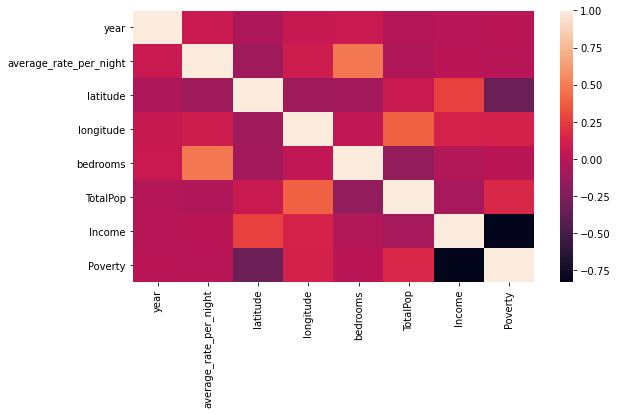

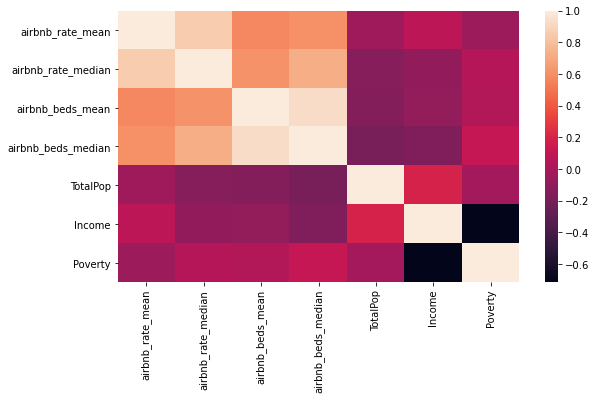

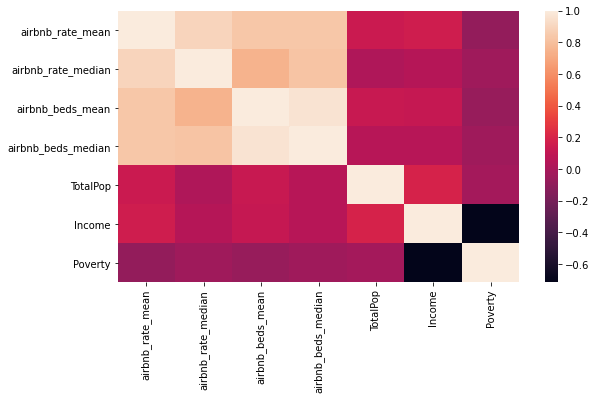

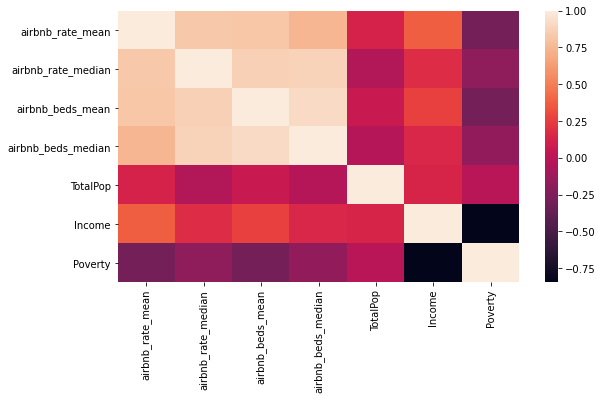

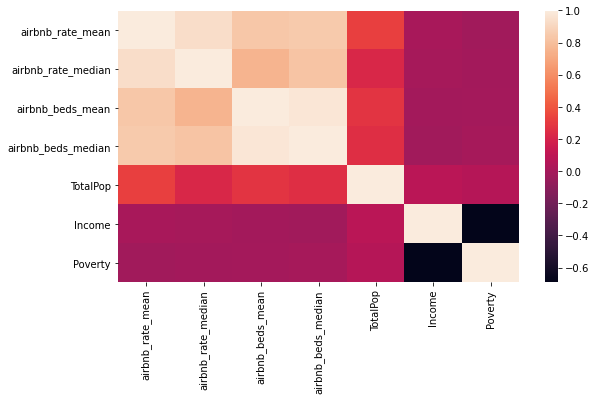

In [67]:
# Create heatmap for correlation values (must get figure knowledge from examples )
plt.figure(figsize=(9,5))
sns.heatmap(corrs1)
plt.show()
    
plt.figure(figsize=(9,5))
sns.heatmap(corrs2)
plt.show()
    
plt.figure(figsize=(9,5))
sns.heatmap(corrs3)
plt.show()

plt.figure(figsize=(9,5))
sns.heatmap(corrs4)
plt.show()

plt.figure(figsize=(9,5))
sns.heatmap(corrs5)
plt.show()

In [72]:
feature = clean_tx2[["Poverty"]]
target = clean_tx2["Income"]
    
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                 3.737e+04
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:01:09   Log-Likelihood:            -1.7252e+05
No. Observations:               16799   AIC:                         3.450e+05
Df Residuals:                   16797   BIC:                         3.451e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.397e+04    178.104    527.586      0.000    9.36e+04    9.43e+04
Poverty    -2212.5221     11.446   -193.307      0.000   -2234.957   -2190.087
==============================================================================
Omnibus:                     1793.893   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5433.151
Skew:                          -0.567   Prob(JB):                         0.00
Kurtosis:                       5.545   Cond. No.                         51.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
feature = clean_tx2["bedrooms"]
target = clean_tx2["average_rate_per_night"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target
    
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     average_rate_per_night   R-squared:                       0.229
Model:                                OLS   Adj. R-squared:                  0.228
Method:                     Least Squares   F-statistic:                     4975.
Date:                    Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                            23:49:30   Log-Likelihood:            -1.2329e+05
No. Observations:                   16799   AIC:                         2.466e+05
Df Residuals:                       16797   BIC:                         2.466e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -78.0897      5.040    -15.493      0.000     -87.969     -68.210
bedrooms     164.0335      2.326     70.533      0.000     159.475     168.592
==============================================================================
Omnibus:                    28032.439   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         29170042.524
Skew:                          11.261   Prob(JB):                         0.00
Kurtosis:                     205.896   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

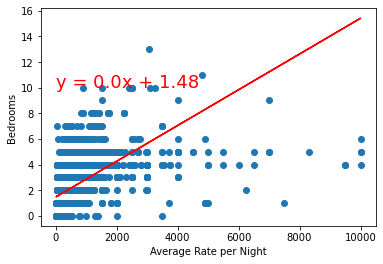

In [69]:
# Add the linear regression equation and line to plot
x_values = clean_tx2["average_rate_per_night"]
y_values = clean_tx2["bedrooms"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=18,color="red")
plt.xlabel('Average Rate per Night')
plt.ylabel('Bedrooms')
plt.show()

In [70]:
feature = clean_tx4[["TotalPop"]]
target = clean_tx4["airbnb_rate_mean"]
                     
# STATSMODELS
X = sm.add_constant(feature)
Y = target
    
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       airbnb_rate_mean   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.037
Date:                Mon, 02 Aug 2021   Prob (F-statistic):             0.0257
Time:                        23:57:43   Log-Likelihood:                -1615.0
No. Observations:                 254   AIC:                             3234.
Df Residuals:                     252   BIC:                             3241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.9390      9.132      9.192      0.000      65.954     101.924
TotalPop     5.08e-05   2.26e-05      2.244      0.026    6.22e-06    9.54e-05
==============================================================================
Omnibus:                      187.994   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2641.440
Skew:                           2.811   Prob(JB):                         0.00
Kurtosis:                      17.764   Cond. No.                     4.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
feature = clean_tx4[["airbnb_rate_mean"]]
target = clean_tx4["TotalPop"]
    
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TotalPop   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.037
Date:                Mon, 02 Aug 2021   Prob (F-statistic):             0.0257
Time:                        23:59:55   Log-Likelihood:                -3627.0
No. Observations:                 254   AIC:                             7258.
Df Residuals:                     252   BIC:                             7265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.346e+04   2.87e+04      2.559      0.011    1.69e+04     1.3e+05
airbnb_rate_mean   385.7220    171.865      2.244      0.026      47.247     724.197
==============================================================================
Omnibus:                      392.052   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56876.132
Skew:                           7.682   Prob(JB):                         0.00
Kurtosis:                      74.680   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
feature = clean_tx4[["TotalPop"]]
target = clean_tx4["airbnb_rate_mean"]
    
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       airbnb_rate_mean   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.037
Date:                Tue, 03 Aug 2021   Prob (F-statistic):             0.0257
Time:                        00:02:08   Log-Likelihood:                -1615.0
No. Observations:                 254   AIC:                             3234.
Df Residuals:                     252   BIC:                             3241.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.9390      9.132      9.192      0.000      65.954     101.924
TotalPop     5.08e-05   2.26e-05      2.244      0.026    6.22e-06    9.54e-05
==============================================================================
Omnibus:                      187.994   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2641.440
Skew:                           2.811   Prob(JB):                         0.00
Kurtosis:                      17.764   Cond. No.                     4.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
feature = clean_tx4[["Poverty"]]
target = clean_tx4["airbnb_beds_mean"]
    
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       airbnb_beds_mean   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.168
Date:                Tue, 03 Aug 2021   Prob (F-statistic):              0.281
Time:                        00:05:36   Log-Likelihood:                -397.82
No. Observations:                 254   AIC:                             799.6
Df Residuals:                     252   BIC:                             806.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0697      0.214      5.002      0.000       0.649       1.491
Poverty       -0.0133      0.012     -1.081      0.281      -0.038       0.011
==============================================================================
Omnibus:                       78.476   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.833
Skew:                           1.454   Prob(JB):                     2.69e-41
Kurtosis:                       6.033   Cond. No.                         51.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
feature = clean_tx4[["Poverty"]]
target = clean_tx4["airbnb_rate_mean"]
    
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       airbnb_rate_mean   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.751
Date:                Tue, 03 Aug 2021   Prob (F-statistic):              0.187
Time:                        00:06:06   Log-Likelihood:                -1616.6
No. Observations:                 254   AIC:                             3237.
Df Residuals:                     252   BIC:                             3244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.6960     25.948      4.690      0.000      70.594     172.798
Poverty       -1.9757      1.493     -1.323      0.187      -4.916       0.965
==============================================================================
Omnibus:                      181.338   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2366.372
Skew:                           2.699   Prob(JB):                         0.00
Kurtosis:                      16.944   Cond. No.                         51.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
feature = clean_tx4[["Income"]]
target = clean_tx4["airbnb_rate_mean"]
    
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       airbnb_rate_mean   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     6.295
Date:                Tue, 03 Aug 2021   Prob (F-statistic):             0.0127
Time:                        00:06:52   Log-Likelihood:                -1614.4
No. Observations:                 254   AIC:                             3233.
Df Residuals:                     252   BIC:                             3240.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3262     37.219     -0.036      0.972     -74.625      71.973
Income         0.0018      0.001      2.509      0.013       0.000       0.003
==============================================================================
Omnibus:                      182.970   Durbin-Watson:                   2.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2495.039
Skew:                           2.714   Prob(JB):                         0.00
Kurtosis:                      17.362   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
feature = clean_tx4[["Income"]]
target = clean_tx4["airbnb_beds_mean"]
    
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       airbnb_beds_mean   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.432
Date:                Tue, 03 Aug 2021   Prob (F-statistic):             0.0651
Time:                        00:08:03   Log-Likelihood:                -396.69
No. Observations:                 254   AIC:                             797.4
Df Residuals:                     252   BIC:                             804.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2978      0.308      0.966      0.335      -0.309       0.905
Income      1.112e-05      6e-06      1.853      0.065   -7.01e-07    2.29e-05
==============================================================================
Omnibus:                       80.787   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.300
Skew:                           1.483   Prob(JB):                     8.70e-44
Kurtosis:                       6.153   Cond. No.                     2.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
feature = urban_cleantx_df[["Income"]]
target = urban_cleantx_df["airbnb_rate_mean"]
    
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       airbnb_rate_mean   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     9.907
Date:                Tue, 03 Aug 2021   Prob (F-statistic):            0.00255
Time:                        00:14:04   Log-Likelihood:                -387.89
No. Observations:                  63   AIC:                             779.8
Df Residuals:                      61   BIC:                             784.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -47.8696     60.496     -0.791      0.432    -168.839      73.100
Income         0.0033      0.001      3.147      0.003       0.001       0.005
==============================================================================
Omnibus:                        2.085   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                2.035
Skew:                           0.413   Prob(JB):                        0.362
Kurtosis:                       2.695   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

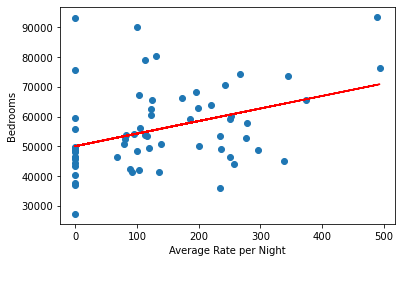

<Figure size 432x288 with 0 Axes>

In [81]:
# Add the linear regression equation and line to plot
x_values = urban_cleantx_df["airbnb_rate_mean"]
y_values = urban_cleantx_df["Income"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=18,color="red")
plt.xlabel('Average Rate per Night')
plt.ylabel('Bedrooms')
plt.show()
plt.savefig("Urban_income_rate_correlation.png")

In [82]:
feature = urban_cleantx_df[["Income"]]
target = urban_cleantx_df["airbnb_beds_mean"]
    
# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       airbnb_beds_mean   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     4.729
Date:                Tue, 03 Aug 2021   Prob (F-statistic):             0.0335
Time:                        00:15:26   Log-Likelihood:                -79.274
No. Observations:                  63   AIC:                             162.5
Df Residuals:                      61   BIC:                             166.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3652      0.451      0.810      0.421      -0.537       1.267
Income      1.706e-05   7.84e-06      2.175      0.034    1.37e-06    3.27e-05
==============================================================================
Omnibus:                        4.549   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                3.597
Skew:                          -0.465   Prob(JB):                        0.166
Kurtosis:                       2.289   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

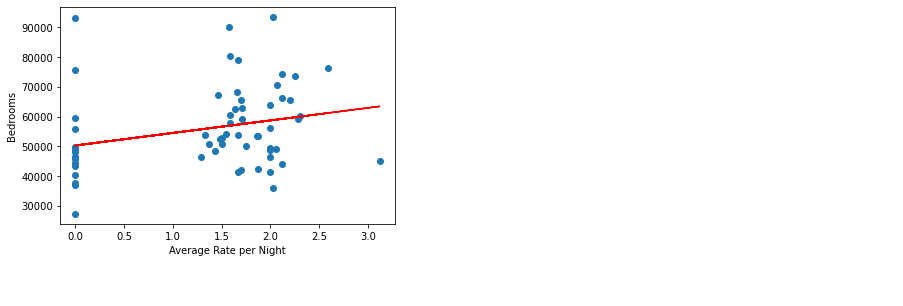

<Figure size 432x288 with 0 Axes>

In [83]:
# Add the linear regression equation and line to plot
x_values = urban_cleantx_df["airbnb_beds_mean"]
y_values = urban_cleantx_df["Income"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=18,color="red")
plt.xlabel('Average Rate per Night')
plt.ylabel('Bedrooms')
plt.show()
plt.savefig("Urban_income_rate_correlation.png")